In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [88]:
df=pd.read_excel("C:/Users/Hp/Desktop/data.xlsx")
df.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


In [89]:
df.shape
df=df.drop(["LoanNr_ChkDgt","Name","City","State","Zip","Bank","BankState"],axis=1)
df=df.drop(["RevLineCr","LowDoc","ApprovalDate","ApprovalFY","DisbursementGross","DisbursementDate","NAICS"],axis=1)

In [90]:
df.head()

,Selected,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,ChgOffDate,BalanceGross,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,36,1,1.0,0,0,1,0,NaN,0,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,56,1,1.0,0,0,1,0,NaN,0,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,36,10,1.0,0,0,1,0,NaN,0,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,36,6,1.0,0,0,1,0,NaN,0,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,240,65,1.0,3,65,1,1,NaN,0,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


In [91]:
df["xx"].fillna(np.mean(df["xx"]), inplace = True)
#df["DisbursementDate"].fillna(np.mean(df["DisbursementDate"]), inplace = True)
df["NewExist"].fillna(np.mean(df["NewExist"]), inplace = True)
df["ChgOffDate"].fillna(np.mean(df["ChgOffDate"]), inplace = True)

In [92]:
df.isnull().values.any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selected       2102 non-null   int64  
 1   Term           2102 non-null   int64  
 2   NoEmp          2102 non-null   int64  
 3   NewExist       2102 non-null   float64
 4   CreateJob      2102 non-null   int64  
 5   RetainedJob    2102 non-null   int64  
 6   FranchiseCode  2102 non-null   int64  
 7   UrbanRural     2102 non-null   int64  
 8   ChgOffDate     2102 non-null   float64
 9   BalanceGross   2102 non-null   int64  
 10  MIS_Status     2102 non-null   object 
 11  ChgOffPrinGr   2102 non-null   int64  
 12  GrAppv         2102 non-null   int64  
 13  SBA_Appv       2102 non-null   int64  
 14  New            2102 non-null   int64  
 15  RealEstate     2102 non-null   int64  
 16  Portion        2102 non-null   float64
 17  Recession      2102 non-null   int64  
 18  daysterm

In [93]:
from sklearn.preprocessing import LabelEncoder
var=LabelEncoder()
df[["MIS_Status"]]=var.fit_transform(df[["MIS_Status"]])

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [94]:
target=df["Selected"]
ind_var=df.iloc[:,1:]

In [95]:
x_train,x_test,y_train,y_test=train_test_split(ind_var,target,train_size=0.60,random_state=42)

In [96]:
std_scale=StandardScaler()
x_train1=std_scale.fit_transform(x_train)
x_test1=std_scale.fit_transform(x_test)

In [97]:
k_value=[i for i in range(1,10)]
k_score=[]
for k in k_value:
    knn=KNeighborsClassifier(n_neighbors=k,n_jobs=1)
    cv_score=cross_val_score(knn,x_train,y_train,cv=5,scoring="accuracy")
    k_score.append(cv_score.mean())
optimal_k=k_score.index(max(k_score))
print("The optimal value of k is %d" %optimal_k)

The optimal value of k is 4


In [98]:
#KNN
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("The accuracy for KNN model is %f" % accuracy_score(y_test,y_pred))
scores=cross_val_score(knn,x_train,y_train,cv=5)
print("confusion matrix is")
print(confusion_matrix(y_test,y_pred))

The accuracy for KNN model is 0.526754
confusion matrix is
[[307 118]
 [280 136]]


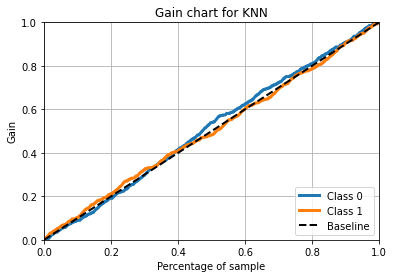

In [99]:
import matplotlib.pyplot as plt

import scikitplot as skplt
y_pred=knn.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pred)
plt.title("Gain chart for KNN")
plt.show()

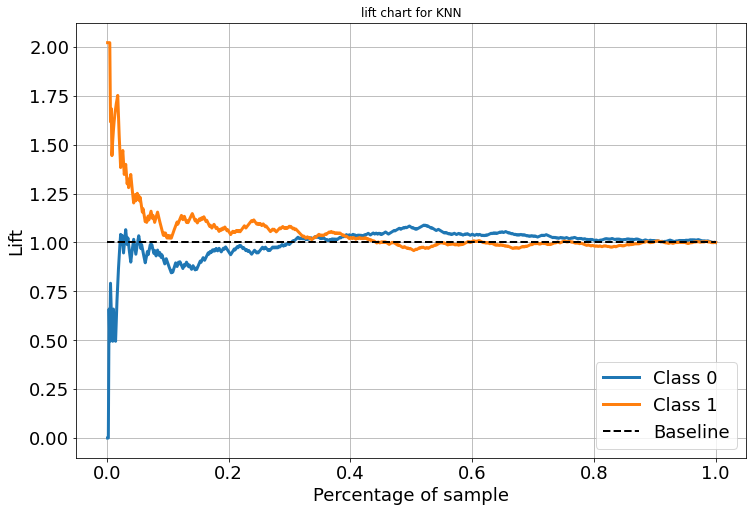

In [100]:
skplt.metrics.plot_lift_curve(
    y_test,y_pred, figsize=(12, 8), title_fontsize=20, text_fontsize=18)
plt.title("lift chart for KNN")
plt.show()

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
accuracy_score(y_test,y_pred1)
print("The accuracy for Gaussian naive bays Regression model is %f" % accuracy_score(y_test,y_pred1))
scores=cross_val_score(gnb,x_train,y_train,cv=5)
print("confusion matrix is")
print(confusion_matrix(y_test,y_pred1))

The accuracy for Gaussian naive bays Regression model is 0.527943
confusion matrix is
[[381  44]
 [353  63]]


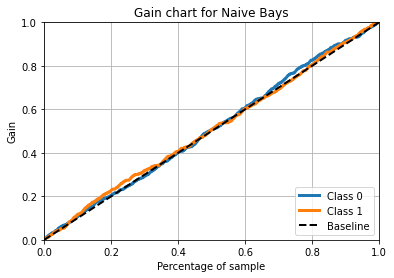

In [103]:
import matplotlib.pyplot as plt

import scikitplot as skplt
y_pred1=gnb.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pred1)
plt.title("Gain chart for Naive Bays")
plt.show()

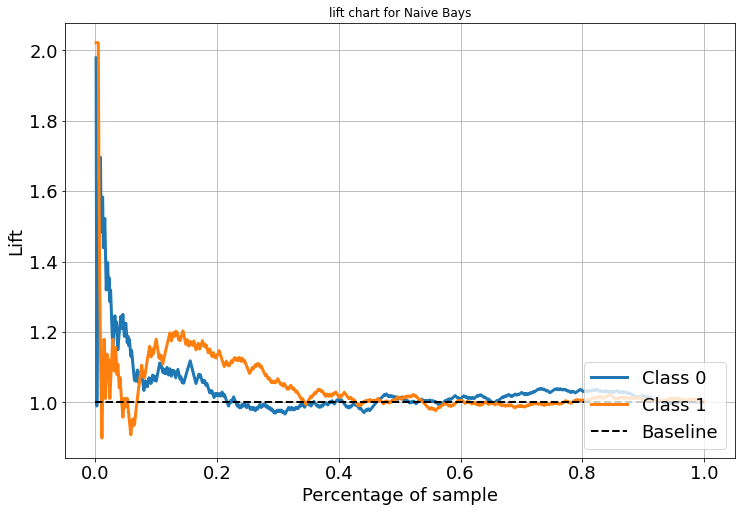

In [104]:
skplt.metrics.plot_lift_curve(
    y_test,y_pred1, figsize=(12, 8), title_fontsize=20, text_fontsize=18)
plt.title("lift chart for Naive Bays")
plt.show()

In [105]:
#Gridsearchcv
parameters = {'criterion':('gini','entropy'),'max_depth':(2,3,4,5,6,7,8),'min_samples_leaf':(2,3,4,5,6,7,8)}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,cv=3)
grid_model=grid.fit(x_train,y_train)
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [106]:
tree=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
print(confusion_matrix(y_test,pred))
accuracy_score(y_test,pred)
print("The accuracy for Gaussian naive bays Regression model is %f" % accuracy_score(y_test,pred))

[[104 321]
 [101 315]]
The accuracy for Gaussian naive bays Regression model is 0.498216


G:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


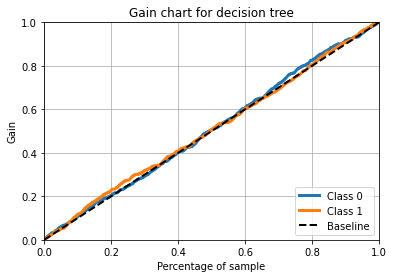

In [107]:
import matplotlib.pyplot as plt

import scikitplot as skplt
pred=gnb.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test,pred)
plt.title("Gain chart for decision tree")
plt.show()

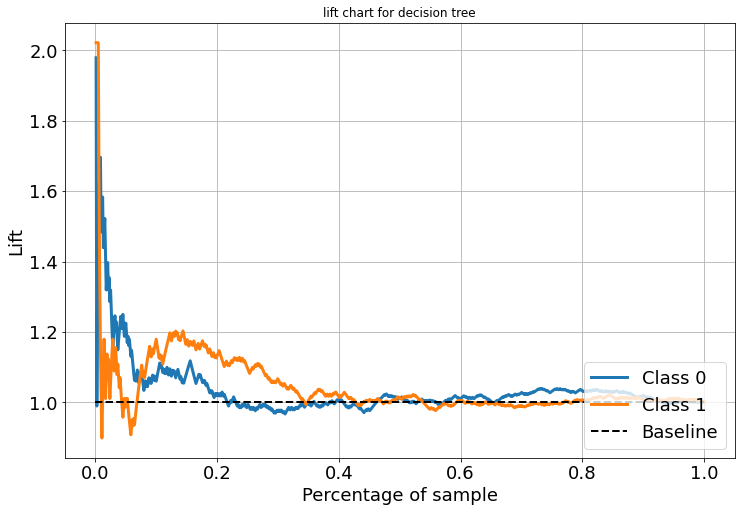

In [108]:
skplt.metrics.plot_lift_curve(
    y_test,pred, figsize=(12, 8), title_fontsize=20, text_fontsize=18)
plt.title("lift chart for decision tree")
plt.show()

# b

In [109]:
# spliting data set into training and testing
x_train,x_test,y_train,y_test=train_test_split(ind_var,target,train_size=0.80,random_state=42)
#Spliting into training and validation set
x_train1,x_cv,y_train1,y_cv=train_test_split(x_train,y_train,train_size=0.70,random_state=42)

In [110]:
k_value=[i for i in range(1,10)]
k_score=[]
for k in k_value:
    knn=KNeighborsClassifier(n_neighbors=k,n_jobs=1)
    cv_score=cross_val_score(knn,x_cv,y_cv,cv=5,scoring="accuracy")
    k_score.append(cv_score.mean())
optimal_k=k_score.index(max(k_score))
print("The optimal value of k is %d" %optimal_k)

The optimal value of k is 4


In [111]:
#training validation confusion matrix
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train1,y_train1)
y_pred=knn.predict(x_cv)
print("The accuracy for KNN model is %f" % accuracy_score(y_cv,y_pred))
print("confusion matrix is")
print(confusion_matrix(y_cv,y_pred))

The accuracy for KNN model is 0.491089
confusion matrix is
[[167  65]
 [192  81]]


In [112]:
#training testing confusion matrix
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train1,y_train1)
y_pred=knn.predict(x_test)
print("The accuracy for KNN model is %f" % accuracy_score(y_test,y_pred))
print("confusion matrix is")
print(confusion_matrix(y_test,y_pred))

The accuracy for KNN model is 0.494062
confusion matrix is
[[153  74]
 [139  55]]
